## 1.Project goal.
The only goal is try to predict salary based on other atributes of each person that are in data set. 

## 2.Exploratory data analysis.

### 2.1 General.

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
sns.set_theme(style="darkgrid")

data = pd.read_csv(r"data/Salary_Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Missing data.

In [83]:
data[data.isnull().any(axis=1)]
#Amount of rows containing missing data is so small so we can just drop it
data.dropna(inplace=True)
data[data.isnull().any(axis=1)]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary


Column: 'Age' (and relationship between 'Salary') 

count    6698.000000
mean       33.623022
std         7.615784
min        21.000000
25%        28.000000
50%        32.000000
75%        38.000000
max        62.000000
Name: Age, dtype: float64


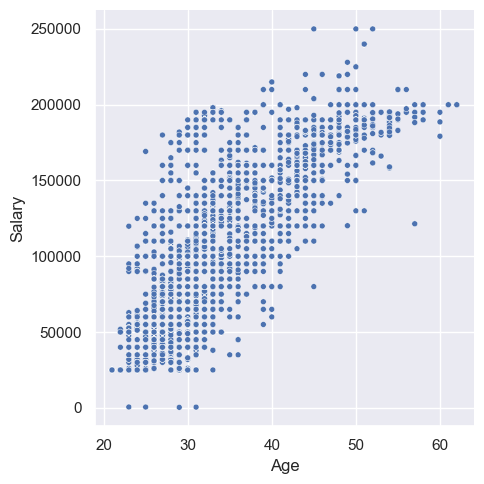

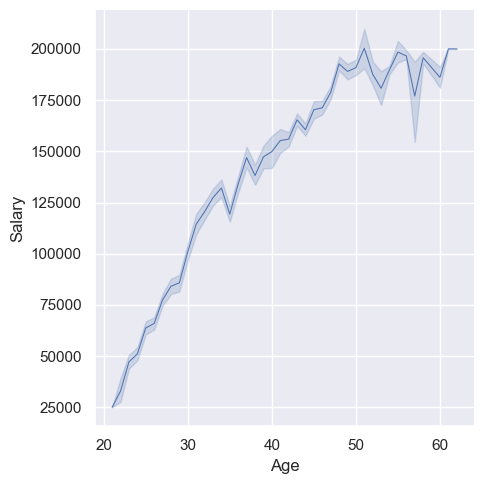

In [84]:
print(data['Age'].describe())

sns.relplot(data=data, x='Age', y='Salary', size=3, legend=None)
sns.relplot(data=data, x='Age', y='Salary', size=3, legend=None, kind="line")


Column: 'Gender' (and relationship between 'Salary') 

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64
Gender
Male      3679
Female    3019
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='Salary'>

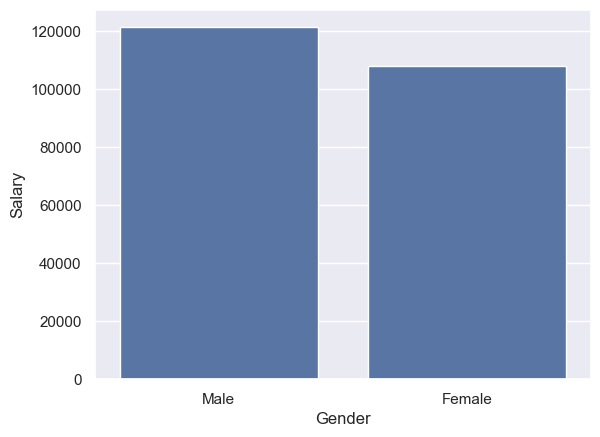

In [85]:
print(data['Gender'].value_counts())

data['Gender'] = data['Gender'].apply(lambda x: np.random.choice(['Male', 'Female'], p=[3671/6684, 3013/6684]) if x == 'Other' else x)

print(data['Gender'].value_counts())

sns.barplot(data=data, x='Gender', y='Salary', errorbar=None, estimator=np.mean)

Column: 'Educational Level' (and relationship between 'Salary') 

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

Education Level
Bachelor's Degree    3021
Master's Degree      1860
PhD                  1369
High School           448
Name: count, dtype: int64


<Axes: xlabel='Education Level', ylabel='Salary'>

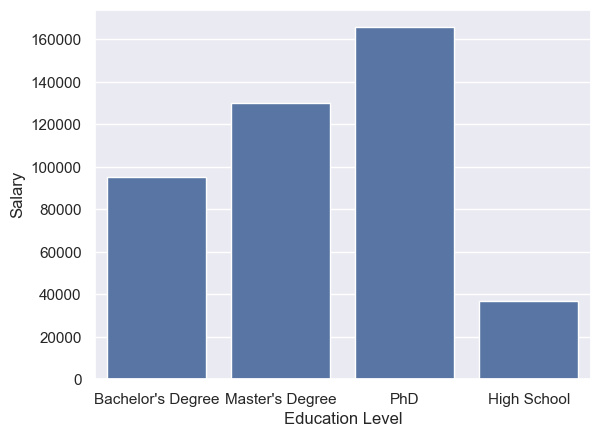

In [86]:
print(data['Education Level'].value_counts())
#Bachelor's = Bachelor's Degree
#Master's = Master's Degree
#phD = PhD

data['Education Level'].replace("Bachelor's", "Bachelor's Degree", inplace=True)
data['Education Level'].replace("Master's", "Master's Degree", inplace=True)
data['Education Level'].replace("phD", "PhD", inplace=True)

print()
print(data['Education Level'].value_counts())

sns.barplot(data=data, x='Education Level', y='Salary', estimator=np.mean, errorbar=None)

Column: 'Job Title' (and relationship between 'Salary') 

Amount of job titles: 191
Level
Mid       4699
Senior    1426
Junior     573
Name: count, dtype: int64
Job Type
Manager      2109
Developer    2070
Analyst      1313
Marketing     762
HR            270
Other         174
Name: count, dtype: int64


<Axes: xlabel='Level', ylabel='Salary'>

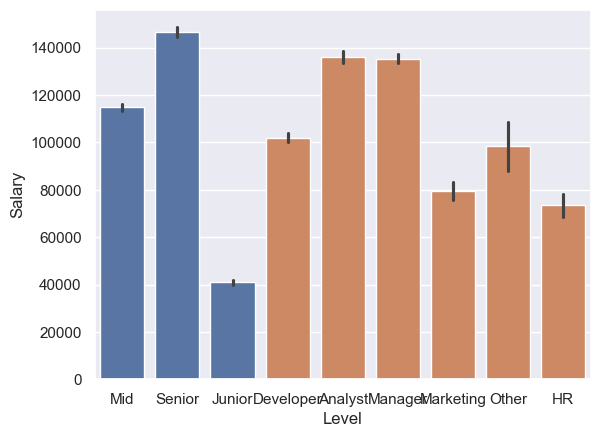

In [87]:
print("Amount of job titles:",len(data['Job Title'].unique()))

#print(data['Job Title'].unique())

#It makes sense to split this column to Level=['Junior', 'Mid', 'Senior'] and Job Type=['Manager', 'Developer', 'Analyst' etc.]
data.reset_index(drop=True, inplace=True)
data.insert(3, 'Level', "")
data.insert(4, 'Job Type', "")

for i in range(len(data)):
    job_title = data.at[i, 'Job Title']

    if re.search('Junior', job_title):
        level = 'Junior'
    elif re.search('Senior|Director|Specialist' , job_title):
        level = 'Senior'
    elif re.search('Mid', job_title):
        level = 'Mid'
    else:
        level = 'Mid'

    data.at[i, 'Level'] = level

for i in range(len(data)):
    job_title = data.at[i, 'Job Title']

    if re.search('Manager|Project|Operations', job_title):
        job_type = 'Manager'
    elif re.search('Developer|Software|UX|IT|Designer|Full Stack', job_title):
        job_type = 'Developer'
    elif re.search('Analyst|Data|Scientist', job_title):
        job_type = 'Analyst'
    elif re.search('Business|Sales|Marketing|Financial|Accountant|Finance', job_title):
        job_type = 'Marketing'
    elif re.search('HR|Human|Recruiter|Training', job_title):
        job_type = 'HR'
    else:
        job_type = 'Other'

    data.at[i, 'Job Type'] = job_type

data.drop(columns=['Job Title'], inplace=True)
print(data['Level'].value_counts())
print(data['Job Type'].value_counts())

sns.barplot(data=data, x='Level', y='Salary')
sns.barplot(data=data, x='Job Type', y='Salary')



Column: 'Years of Experience' (and relationship between 'Salary') 

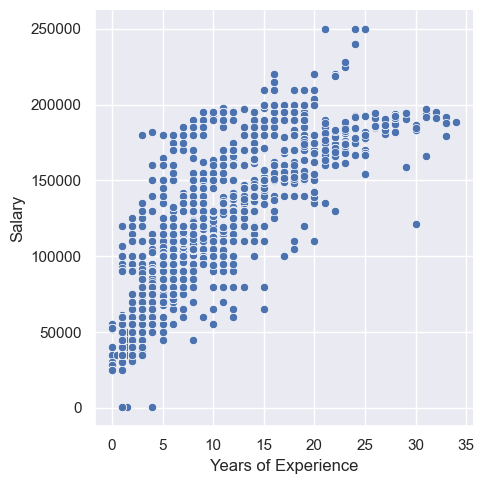

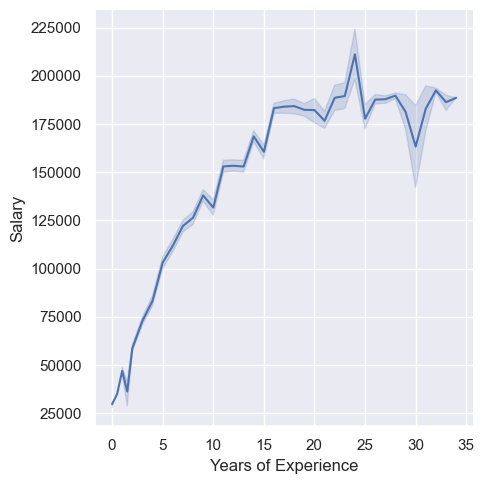

In [88]:
sns.relplot(data=data, x='Years of Experience', y='Salary')
sns.relplot(data=data, x='Years of Experience', y='Salary', kind="line")

In [89]:
data.head()

,Age,Gender,Education Level,Level,Job Type,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Mid,Developer,5.0,90000.0
1,28.0,Female,Master's Degree,Mid,Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior,Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Mid,Marketing,7.0,60000.0
4,52.0,Male,Master's Degree,Senior,Other,20.0,200000.0


## 3.Making models.

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rnd_seed = 44
results = {}

data_encoded = pd.get_dummies(data, columns=['Gender', 'Education Level', 'Level', 'Job Type'])
X = data_encoded.drop(['Age', 'Years of Experience', 'Gender_Female', 'Gender_Male', "Education Level_Bachelor's Degree", 'Education Level_High School', "Education Level_Master's Degree", 'Education Level_PhD', 'Level_Junior', 'Level_Mid', 'Level_Senior', 'Job Type_Analyst', 'Job Type_Developer', 'Job Type_HR', 'Job Type_Manager', 'Job Type_Marketing', 'Job Type_Other'], axis=1)
y = data_encoded['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rnd_seed)

Regression Tree.

In [91]:
tree_model = DecisionTreeRegressor(random_state=rnd_seed, min_samples_split=20)

tree_model.fit(X_train, y_train)

y_pred_train = tree_model.predict(X_train)
y_pred_tree = tree_model.predict(X_test)

mse_tree_train = mean_squared_error(y_train, y_pred_train)
mse_tree = mean_squared_error(y_test, y_pred_tree)

print("Mean squared error for regression tree training data:", round(mse_tree_train, 2))
print("Mean squared error for regression tree test data:", round(mse_tree, 2))

results["Regression tree"] = mse_tree


Mean squared error for regression tree training data: 74246.67
Mean squared error for regression tree test data: 34368.21


Random Forest.

In [92]:
forest_model = RandomForestRegressor(n_estimators=50, random_state=rnd_seed, min_samples_split=20)

forest_model.fit(X_train, y_train)

y_pred_train = forest_model.predict(X_train)
y_pred_forest = forest_model.predict(X_test)

mse_forest_train = mean_squared_error(y_train, y_pred_train)
mse_forest = mean_squared_error(y_test, y_pred_forest)

print("Mean squared error for random forest training data:", round(mse_forest_train, 2))
print("Mean squared error for random forest test data:", round(mse_forest, 2))

results["Random forest"] = mse_forest

Mean squared error for random forest training data: 85484.75
Mean squared error for random forest test data: 27330.7


## 4.Conclusions

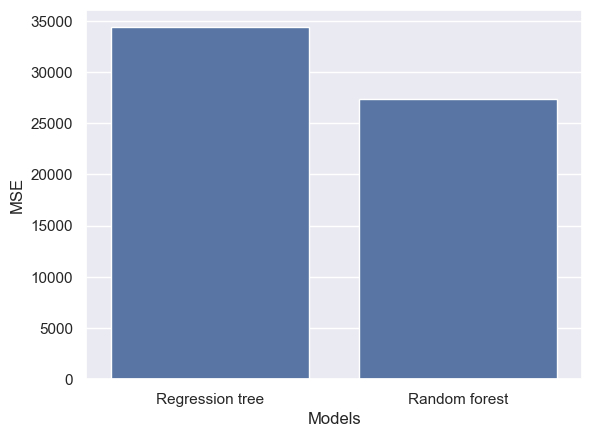

In [93]:
keys = list(results.keys())
values = list(results.values())

sns.barplot(x=keys, y=values)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()
